By comparing the latitudes, longitudes, temperatures, humidities, cloudiness, and wind speeds of 600+ cities around the world, we observed a few trends: 

1) Temperatures are on the higher end for latitudes in between 20 and 40. Temperatures become lower when latitudes are further away from 0. 

2) Our sample cities are humid in general. There are limited number of cities which humidity is below 40%. However, similar to cloudiness, both of humidity and cloudiness aren’t directly related to their latitudes. 

3) The majority of our cities have wind speed less than 15 MPH. Wind speed also seems to be lower when latitude is closer to zero. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
# Create and add columns into DataFrame 

df_cities = pd.DataFrame({'Cities': cities})

df_cities.loc[:,'Latitude'] = ''
df_cities.loc[:,'Longitude'] = ''
df_cities.loc[:,'Temperature (F)'] = ''
df_cities.loc[:,'Humidity (%)'] = ''
df_cities.loc[:,'Cloudiness (%)'] = ''
df_cities.loc[:,'Wind Speed (mph)'] = ''

# Drop duplicates in cities, if there's any

df_cities = df_cities.drop_duplicates(['Cities'])
df_cities.head(5)

,Cities,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ushuaia,,,,,,
1,vychegodskiy,,,,,,
2,belushya guba,,,,,,
3,meylan,,,,,,
4,ozgon,,,,,,


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial'

# Use cities to call weather data
for index,row in df_cities.iterrows():
    city = row['Cities']
    cities = str(city)
    
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point
    try:
        # Use json to call       
        current_weather_url = url + '&appid=' + api_key + '&q=' + cities
        current_weather = requests.get(current_weather_url).json()
        # Referencing "https://openweathermap.org/current" to set API respond format
        df_cities.set_value(index, 'Latitude', current_weather.get('coord',{}).get('lat'))
        df_cities.set_value(index, 'Longitude', current_weather.get('coord',{}).get('lon'))
        df_cities.set_value(index, 'Temperature (F)', current_weather.get('main',{}).get('temp'))
        df_cities.set_value(index, 'Humidity (%)', current_weather.get('main',{}).get('humidity'))
        df_cities.set_value(index, 'Cloudiness (%)', current_weather.get('clouds',{}).get('all'))
        df_cities.set_value(index, 'Wind Speed (mph)', current_weather.get('wind',{}).get('speed'))
        print(f'Processing Record | {city}')
        print(current_weather_url)
    
    except (KeyError, IndexError):
        print(f'No Data found for {city}')
        print(current_weather_url)  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Processing Record | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=ushuaia
Processing Record | vychegodskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vychegodskiy
Processing Record | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=belushya guba
Processing Record | meylan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=meylan
Processing Record | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=ozgon
Processing Record | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=hermanus
Processing Record | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=rikitea
Processin

Processing Record | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=meulaboh
Processing Record | xai-xai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=xai-xai
Processing Record | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=arlit
Processing Record | reshetnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=reshetnikovo
Processing Record | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=tsihombe
Processing Record | pop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=pop
Processing Record | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=amderma
Processing Record | birao

Processing Record | anqing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=anqing
Processing Record | divnogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=divnogorsk
Processing Record | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=tasiilaq
Processing Record | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=egvekinot
Processing Record | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=henties bay
Processing Record | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=praia da vitoria
Processing Record | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0

Processing Record | lufkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=lufkin
Processing Record | tynda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=tynda
Processing Record | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=lompoc
Processing Record | karatu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=karatu
Processing Record | pabna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=pabna
Processing Record | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=bud
Processing Record | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=bambous virieux
Processing Record | nome
http://a

Processing Record | lyubech
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=lyubech
Processing Record | enshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=enshi
Processing Record | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vardo
Processing Record | middlebury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=middlebury
Processing Record | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=faanui
Processing Record | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=caravelas
Processing Record | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=hualmay
Processing Record | iracoub

Processing Record | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=arraial do cabo
Processing Record | eskasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=eskasem
Processing Record | vilhena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vilhena
Processing Record | narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=narasannapeta
Processing Record | jaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=jaciara
Processing Record | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=ballina
Processing Record | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=mezen
Pro

Processing Record | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=coahuayana
Processing Record | buta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=buta
Processing Record | les cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=les cayes
Processing Record | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=lolua
Processing Record | asfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=asfi
Processing Record | muzhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=muzhi
Processing Record | sandy bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=sandy bay
Processing Record | panzhihua
htt

Processing Record | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=seoul
Processing Record | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=batemans bay
Processing Record | mikumi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=mikumi
Processing Record | abu jubayhah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=abu jubayhah
Processing Record | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=santa vitoria do palmar
Processing Record | rurrenabaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=rurrenabaque
Processing Record | jarjis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e64

Processing Record | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=nyurba
Processing Record | zhuanghe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=zhuanghe
Processing Record | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=kahului
Processing Record | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=airai
Processing Record | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=luderitz
Processing Record | taywarah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=taywarah
Processing Record | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=sambava
Processing Record | babanus

Processing Record | podgorenskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=podgorenskiy
Processing Record | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vao
Processing Record | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vuktyl
Processing Record | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=port hedland
Processing Record | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=muros
Processing Record | taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=taksimo
Processing Record | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=lavrentiya
Processing Reco

Processing Record | tillabery
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=tillabery
Processing Record | gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=gushikawa
Processing Record | longonjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=longonjo
Processing Record | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=ixtapa
Processing Record | nueva guinea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=nueva guinea
Processing Record | tawkar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=tawkar
Processing Record | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=790293e26217e6456dcca6091e0dd731&q=vostok
Processing Re

In [5]:
# Output File (CSV)
df_cities.to_csv('../output_data/cities.csv')

In [6]:
df_cities.head(5)

,Cities,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ushuaia,-54.81,-68.31,19.05,100,0,3.13
1,vychegodskiy,61.25,46.88,73.14,62,0,9.95
2,belushya guba,None,None,None,None,None,None
3,meylan,45.21,5.78,60.8,93,0,5.82
4,ozgon,None,None,None,None,None,None


In [7]:
df_cities.dtypes

Cities              object
Latitude            object
Longitude           object
Temperature (F)     object
Humidity (%)        object
Cloudiness (%)      object
Wind Speed (mph)    object
dtype: object

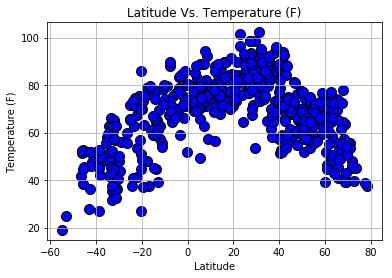

In [12]:
# Temperature (F) vs. Latitude
# Scatter plot creation and formatting

plt.scatter(df_cities['Latitude'], df_cities['Temperature (F)'], marker='o', color='blue', edgecolors='black', s=100)

plt.title('Latitude Vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig('Temp_Lat.png')

plt.show()

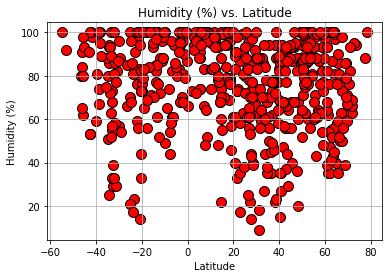

In [13]:
# Humidity (%) vs. Latitude
# Scatter plot creation and formatting

plt.scatter(df_cities['Latitude'], df_cities['Humidity (%)'], marker='o', color='red', edgecolors='black', s=100)

plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig('Humi_Lat.png')

plt.show()

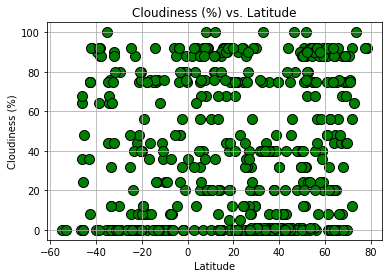

In [14]:
# Cloudiness (%) vs. Latitude
# Scatter plot creation and formatting

plt.scatter(df_cities['Latitude'], df_cities['Cloudiness (%)'], marker='o', color='green', edgecolors='black', s=100)

plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig('Cloud_Lat.png')

plt.show()

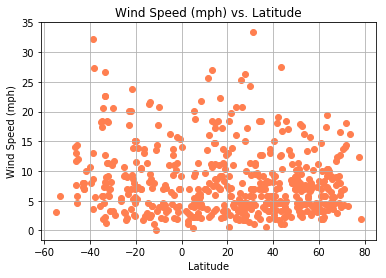

In [15]:
# Wind Speed (mph) vs. Latitude
# Scatter plot creation and formatting

plt.scatter(df_cities['Latitude'], df_cities['Wind Speed (mph)'], marker='o', color='coral')
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig('Wind_Lat.png')

plt.show()